In [156]:
# Final Project: Credit Card Fraud Models
# Group Members: Cole, Jared, Mansuur

In [ ]:
import math
from sklearn import model_selection
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

import random

In [158]:
# Create a function to open input file
# Return list of instances
def get_inst_from_file(filename):
    all_instances = []
    fin = open(filename,"r")
    fin.readline()

    for line in fin:
        all_instances.append(line.strip().split(","))
    
    fin.close()
    
    #Check for nulls, returned nothing
    for instance in all_instances:
        for i in range(7):
            if instance[i] is None:
                print("Instance with none")
                
    return all_instances


In [159]:
# Print first 10 instances
cf_instances = get_inst_from_file("card_transdata.csv")
print(cf_instances[:16])

[['57.87785658389723', '0.3111400080477545', '1.9459399775518593', '1.0', '1.0', '0.0', '0.0', '0.0'], ['10.829942699255545', '0.17559150228166587', '1.2942188106198573', '1.0', '0.0', '0.0', '0.0', '0.0'], ['5.091079490616996', '0.8051525945853258', '0.42771456119427587', '1.0', '0.0', '0.0', '1.0', '0.0'], ['2.2475643282963613', '5.60004354707232', '0.36266257805709584', '1.0', '1.0', '0.0', '1.0', '0.0'], ['44.19093600261837', '0.5664862680583477', '2.2227672978404707', '1.0', '1.0', '0.0', '1.0', '0.0'], ['5.586407674186407', '13.261073268058121', '0.06476846537046335', '1.0', '0.0', '0.0', '0.0', '0.0'], ['3.7240191247148107', '0.9568379284821842', '0.27846494490815554', '1.0', '0.0', '0.0', '1.0', '0.0'], ['4.8482465722805665', '0.3207354272228163', '1.2730495235601782', '1.0', '0.0', '1.0', '0.0', '0.0'], ['0.8766322564943629', '2.5036089266921437', '1.5169993152858177', '0.0', '0.0', '0.0', '0.0', '0.0'], ['8.83904670372637', '2.9705122760243827', '2.36168254706846', '1.0', '0.

In [160]:
# Printing out the number of fraud and not fraud instances respectively
not_fraud_instances = []
fraud_instances = []
for instance in cf_instances:
    if (instance[7] == '1.0'):
        curInstance = instance
        curInstance[7] = 1
        fraud_instances.append(curInstance)
    else:
        curInstance = instance
        curInstance[7] = 0
        not_fraud_instances.append(curInstance)
print(fraud_instances[:10])
print('')
print(not_fraud_instances[:10])

#Creates a smaller sample of non-fradulant purchases, randomly selected w/o overlapo
not_fraud_sample = random.sample(not_fraud_instances, len(fraud_instances))

#Joining the smaller fraud sample with the fraud_instances
allSample = fraud_instances + not_fraud_sample
X = []
y = []


#Creating X and y arrays, X w/o label and y with.
for instance in allSample:
    X.append(instance[:7])
    y.append(instance[7])
{}


[['2.131955665990563', '56.3724005365082', '6.358667321630612', '1.0', '0.0', '0.0', '1.0', 1], ['3.8030573513256023', '67.24108052618409', '1.8729496143044642', '1.0', '0.0', '0.0', '1.0', 1], ['15.694985541059943', '175.98918151972342', '0.8556228290724207', '1.0', '0.0', '0.0', '1.0', 1], ['26.711462023719893', '1.5520081259491354', '4.603600688206188', '1.0', '1.0', '0.0', '1.0', 1], ['10.664473716016785', '1.5657690862016613', '4.886520843107555', '1.0', '0.0', '0.0', '1.0', 1], ['2.530145018135443', '3.6897810904940105', '8.297406866219774', '1.0', '0.0', '0.0', '1.0', 1], ['21.12611616077098', '0.27198739643980063', '6.081770719263626', '1.0', '0.0', '0.0', '1.0', 1], ['151.37043724281128', '5.340080994904885', '1.171566647935164', '1.0', '0.0', '0.0', '1.0', 1], ['9.598401340573979', '0.4545563461632137', '6.084828700634962', '1.0', '0.0', '0.0', '1.0', 1], ['22.545587575167414', '0.35393925466184956', '4.0954422060767035', '1.0', '0.0', '0.0', '1.0', 1]]

[['57.87785658389723'

{}

In [161]:
# Create train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3 , random_state=100)

In [197]:
#Decision tree done with best splits and gini criteria
clf = DecisionTreeClassifier(max_depth=3, max_features=3)
clf = clf.fit(X_train, y_train)

clfy_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, clfy_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.883242439266237


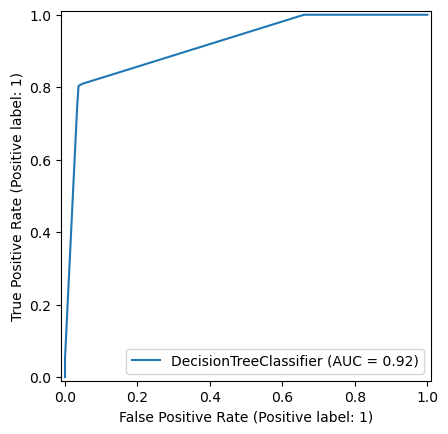

In [198]:
#Decision treerint RoC curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)

7
[2.83444559e-04 1.10414752e-01 8.11860536e-01 0.00000000e+00
 4.36687966e-02 2.50170077e-02 8.75546307e-03]


[Text(0.5, 0.875, 'x[2] <= 4.0\ngini = 0.5\nsamples = 122364\nvalue = [61118, 61246]'),
 Text(0.25, 0.625, 'x[1] <= 50.0\ngini = 0.334\nsamples = 74294\nvalue = [58551, 15743]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 0.5\ngini = 0.281\nsamples = 69857\nvalue = [58044, 11813]'),
 Text(0.0625, 0.125, 'gini = 0.366\nsamples = 49050\nvalue = [37237, 11813]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 20807\nvalue = [20807, 0]'),
 Text(0.375, 0.375, 'x[6] <= 0.5\ngini = 0.202\nsamples = 4437\nvalue = [507, 3930]'),
 Text(0.3125, 0.125, 'gini = 0.432\nsamples = 430\nvalue = [294, 136]'),
 Text(0.4375, 0.125, 'gini = 0.101\nsamples = 4007\nvalue = [213, 3794]'),
 Text(0.75, 0.625, 'x[5] <= 0.5\ngini = 0.101\nsamples = 48070\nvalue = [2567, 45503]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 99.9\ngini = 0.076\nsamples = 47189\nvalue = [1872, 45317]'),
 Text(0.5625, 0.125, 'gini = 0.082\nsamples = 43935\nvalue = [1872, 42063]'),
 Text(0.6875, 0.125, 'gi

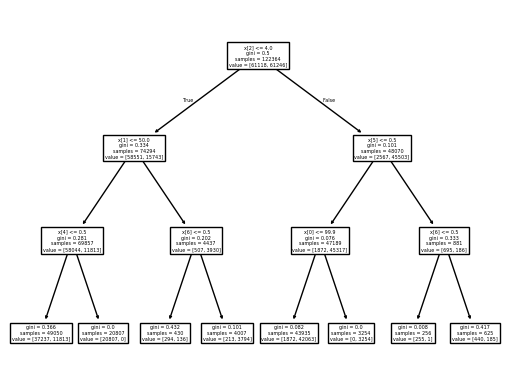

In [199]:
#Generates the image of the decision tree
print(clf.n_features_in_)
print(clf.feature_importances_)
tree.plot_tree(clf)

In [ ]:
#Creating a Random Forest and getting the accuracy score
rf = RandomForestClassifier(max_depth=3, max_features=3)
rf.fit(X_train,y_train)
rfy_pred = rf.predict(X_test)

rfy_pred = rf.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rfy_pred)
print(f'Accuracy: {rf_accuracy}')

Accuracy: 0.9772891956828497


7
[0.17295778 0.04010839 0.61702429 0.00308687 0.00965885 0.02767271
 0.1294911 ]


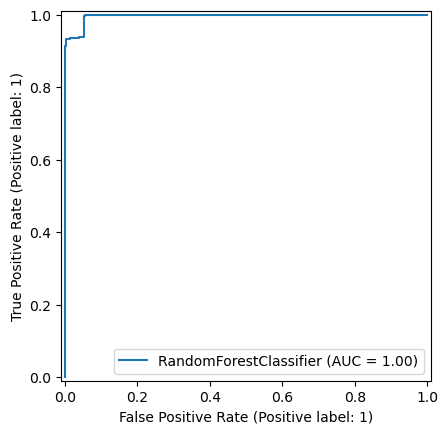

In [ ]:
#Random Forest RoC curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
print(rf.n_features_in_)
print(rf.feature_importances_)


[Text(0.5, 0.875, 'x[0] <= 100.036\ngini = 0.5\nsamples = 77479\nvalue = [61290, 61074]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\ngini = 0.491\nsamples = 66422\nvalue = [59394, 45607]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 4.0\ngini = 0.497\nsamples = 62269\nvalue = [52894, 45558]'),
 Text(0.0625, 0.125, 'gini = 0.122\nsamples = 34458\nvalue = [51021, 3566]'),
 Text(0.1875, 0.125, 'gini = 0.082\nsamples = 27811\nvalue = [1873, 41992]'),
 Text(0.375, 0.375, 'x[0] <= 1.806\ngini = 0.015\nsamples = 4153\nvalue = [6500, 49]'),
 Text(0.3125, 0.125, 'gini = 0.043\nsamples = 472\nvalue = [719.0, 16.0]'),
 Text(0.4375, 0.125, 'gini = 0.011\nsamples = 3681\nvalue = [5781, 33]'),
 Text(0.75, 0.625, 'x[5] <= 0.5\ngini = 0.195\nsamples = 11057\nvalue = [1896, 15467]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 3.987\ngini = 0.171\nsamples = 10787\nvalue = [1597, 15338]'),
 Text(0.5625, 0.125, 'gini = 0.206\nsamples = 8748\nvalue = [1597, 12103]'),
 Text(0.6875, 0

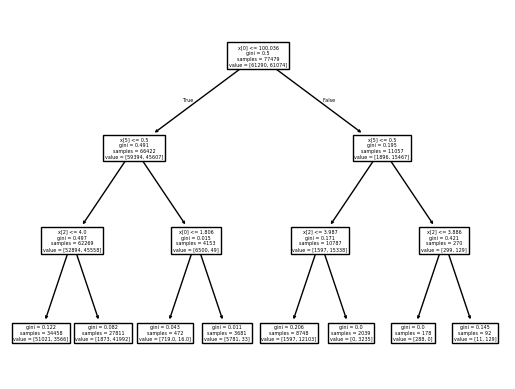

In [203]:
tree.plot_tree(rf[0])

[Text(0.5, 0.875, 'x[6] <= 0.5\ngini = 0.5\nsamples = 77226\nvalue = [61183, 61181]'),
 Text(0.25, 0.625, 'x[4] <= 0.5\ngini = 0.218\nsamples = 16738\nvalue = [23243, 3315]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 50.014\ngini = 0.26\nsamples = 11155\nvalue = [15018, 2728]'),
 Text(0.0625, 0.125, 'gini = 0.244\nsamples = 10853\nvalue = [14819, 2451]'),
 Text(0.1875, 0.125, 'gini = 0.487\nsamples = 302\nvalue = [199, 277]'),
 Text(0.375, 0.375, 'x[5] <= 0.5\ngini = 0.124\nsamples = 5583\nvalue = [8225, 587]'),
 Text(0.3125, 0.125, 'gini = 0.138\nsamples = 5009\nvalue = [7312, 587]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 574\nvalue = [913, 0]'),
 Text(0.75, 0.625, 'x[0] <= 100.037\ngini = 0.478\nsamples = 60488\nvalue = [37940, 57866]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 49.897\ngini = 0.497\nsamples = 50999\nvalue = [37161, 43594]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 48177\nvalue = [36937, 39326]'),
 Text(0.6875, 0.125, 'gi

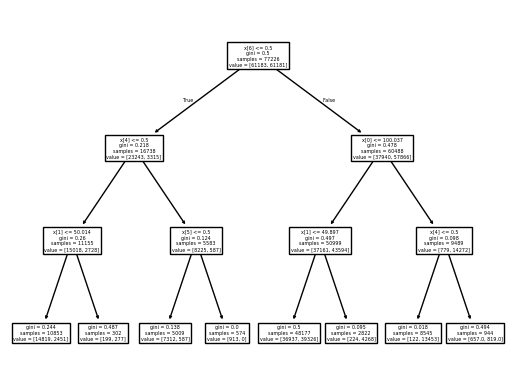

In [204]:
tree.plot_tree(rf[1])

[Text(0.5, 0.875, 'x[4] <= 0.5\ngini = 0.5\nsamples = 77246\nvalue = [60846.0, 61518.0]'),
 Text(0.25, 0.625, 'x[0] <= 100.023\ngini = 0.497\nsamples = 53260\nvalue = [38768.0, 45640.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 50.006\ngini = 0.495\nsamples = 43716\nvalue = [37923, 31293]'),
 Text(0.0625, 0.125, 'gini = 0.487\nsamples = 41035\nvalue = [37686, 27238]'),
 Text(0.1875, 0.125, 'gini = 0.104\nsamples = 2681\nvalue = [237, 4055]'),
 Text(0.375, 0.375, 'x[5] <= 0.5\ngini = 0.105\nsamples = 9544\nvalue = [845, 14347]'),
 Text(0.3125, 0.125, 'gini = 0.085\nsamples = 9343\nvalue = [663, 14215]'),
 Text(0.4375, 0.125, 'gini = 0.487\nsamples = 201\nvalue = [182, 132]'),
 Text(0.75, 0.625, 'x[2] <= 4.0\ngini = 0.487\nsamples = 23986\nvalue = [22078, 15878]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 0.485\ngini = 0.029\nsamples = 13546\nvalue = [21072, 312]'),
 Text(0.5625, 0.125, 'gini = 0.016\nsamples = 3898\nvalue = [6197, 51]'),
 Text(0.68

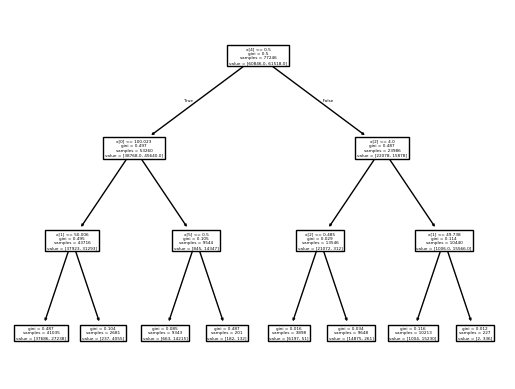

In [207]:
tree.plot_tree(rf[99])